<a href="https://colab.research.google.com/github/IvanTangZhu19/AstronomIA/blob/main/AstronomIA_Preparaci%C3%B3n_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AstronomIA- Preparación de datos**

Datos: Sacados de Kaggle de predicción astral

1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos: atípicos y nulos
5. Análisis de correlaciones: redundancias entre todas las variables e irrelevancias respecto a la objetivo
6. Balanceo
7. Ingeniería de características: *comunmente se hacen en el notebook de creación de modelos ya que dependen del modelo a utilizar.*
8. Guardar los datos preparados


In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

#1. Integración de datos

- Carga de datos
- Duplicados
- *Nota: Los datos ya están integrados en un csv*

###Carga de datos

In [3]:
# Se descargan los datos
import kagglehub
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stellar-classification-dataset-sdss17' dataset.
Path to dataset files: /kaggle/input/stellar-classification-dataset-sdss17


In [4]:
# Se cargan los datos
data = pd.read_csv(f"{path}/star_classification.csv", dtype={"obj_ID": str})
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1237664879951151360,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1237660961330430208,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1237663478724297984,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1237680272041378048,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  object 
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(7), 

###Duplicados

In [6]:
#Se verifican duplicados
ids = data['obj_ID'].value_counts()
ids[ids > 1]

,count
obj_ID,
1.237659326031e+18,17
1237666301627465984,11
1237663785277063424,11
1.237663462605e+18,11
1237666339727540480,11
...,...
1237665441531035648,2
1237665441513210368,2
1237657070092485120,2


In [7]:
#Sólo dejamos el id mas reciente
data.drop_duplicates(subset=['obj_ID'], keep='last', inplace=True)

#Verificamos de nuevo si tenemos ID repetidos
ids = data['obj_ID'].value_counts()
ids[ids > 1]

,count
obj_ID,


In [8]:
#Corrección del tipo de datos object a categorías
data['class']=data['class'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80846 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   obj_ID       80846 non-null  object  
 1   alpha        80846 non-null  float64 
 2   delta        80846 non-null  float64 
 3   u            80846 non-null  float64 
 4   g            80846 non-null  float64 
 5   r            80846 non-null  float64 
 6   i            80846 non-null  float64 
 7   z            80846 non-null  float64 
 8   run_ID       80846 non-null  int64   
 9   rerun_ID     80846 non-null  int64   
 10  cam_col      80846 non-null  int64   
 11  field_ID     80846 non-null  int64   
 12  spec_obj_ID  80846 non-null  float64 
 13  class        80846 non-null  category
 14  redshift     80846 non-null  float64 
 15  plate        80846 non-null  int64   
 16  MJD          80846 non-null  int64   
 17  fiber_ID     80846 non-null  int64   
dtypes: category(1), float64(9), int

#2. Eliminar variables irrelevantes y redundantes

* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos. Por Abeas Data (Protección de datos personales)
* Redundantes: validación por fórmula matemática que están repetidas

In [9]:
# Variables irrelevantes para el proceso de minería
variables_eliminar = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']
data = data.drop(variables_eliminar,axis=1)
data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


#3. Estadística Descriptiva

## Variables numéricas

In [ ]:
#Para datos numéricos
data.describe()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000
mean,179.712694,24.160745,22.037395,20.580424,19.703051,19.128452,18.682585,3.476672,0.584377,5203.812532,55642.475249
std,95.657817,19.437074,35.317058,35.298574,1.855143,1.751144,35.276303,1.588308,0.739235,2917.076558,1774.426557
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,-0.009971,266.000000,51608.000000
25%,128.982091,6.154083,20.425845,19.080135,18.250495,17.835680,17.561500,2.000000,0.056781,2659.500000,54484.000000
50%,182.691543,23.343638,22.303210,21.195375,20.194430,19.449885,19.041040,3.000000,0.442380,5023.000000,55896.000000
75%,235.472650,39.439014,23.789323,22.180855,21.086710,20.426460,19.928162,5.000000,0.705790,7403.000000,56781.000000
max,359.999810,83.000519,32.781390,30.607000,29.571860,30.250090,29.383740,6.000000,7.011245,12547.000000,58932.000000


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'redshift'}>],
       [<Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>, <Axes: >]], dtype=object)

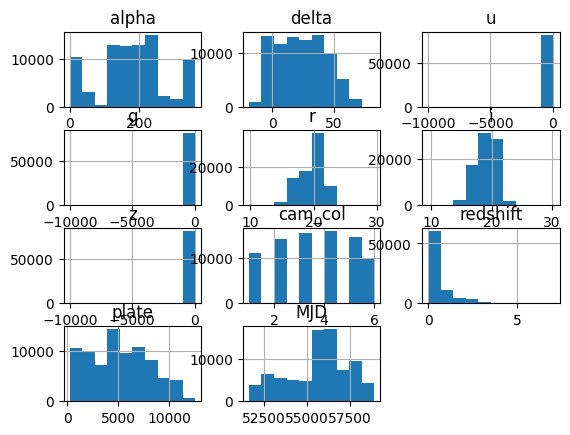

In [ ]:
data.hist()

<Axes: >

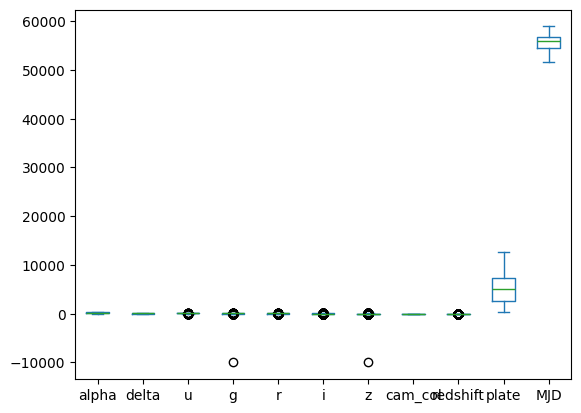

In [ ]:
data.plot.box()

- Se pueden observar unos valores que se sospechan que son atípicos

<Axes: >

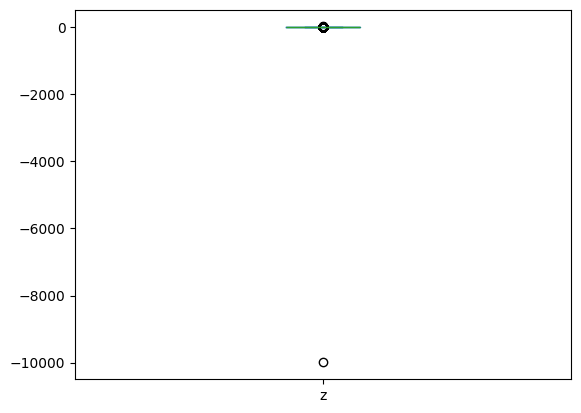

In [ ]:
data['z'].plot.box()

- Se observa un valor demasiado alejado a los demás

## Variables categóricas

<Axes: xlabel='class'>

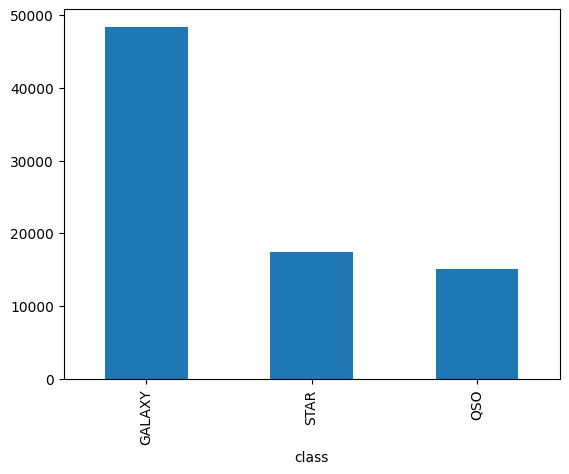

In [ ]:
#Conocemos las variables categóricas: bar, barh, pie
data['class'].value_counts().plot(kind='bar')

##Relaciones entre variables

array([[<Axes: xlabel='alpha', ylabel='alpha'>,
        <Axes: xlabel='delta', ylabel='alpha'>,
        <Axes: xlabel='u', ylabel='alpha'>,
        <Axes: xlabel='g', ylabel='alpha'>,
        <Axes: xlabel='r', ylabel='alpha'>,
        <Axes: xlabel='i', ylabel='alpha'>,
        <Axes: xlabel='z', ylabel='alpha'>,
        <Axes: xlabel='cam_col', ylabel='alpha'>,
        <Axes: xlabel='redshift', ylabel='alpha'>,
        <Axes: xlabel='plate', ylabel='alpha'>,
        <Axes: xlabel='MJD', ylabel='alpha'>],
       [<Axes: xlabel='alpha', ylabel='delta'>,
        <Axes: xlabel='delta', ylabel='delta'>,
        <Axes: xlabel='u', ylabel='delta'>,
        <Axes: xlabel='g', ylabel='delta'>,
        <Axes: xlabel='r', ylabel='delta'>,
        <Axes: xlabel='i', ylabel='delta'>,
        <Axes: xlabel='z', ylabel='delta'>,
        <Axes: xlabel='cam_col', ylabel='delta'>,
        <Axes: xlabel='redshift', ylabel='delta'>,
        <Axes: xlabel='plate', ylabel='delta'>,
        <Axes: xlabel='

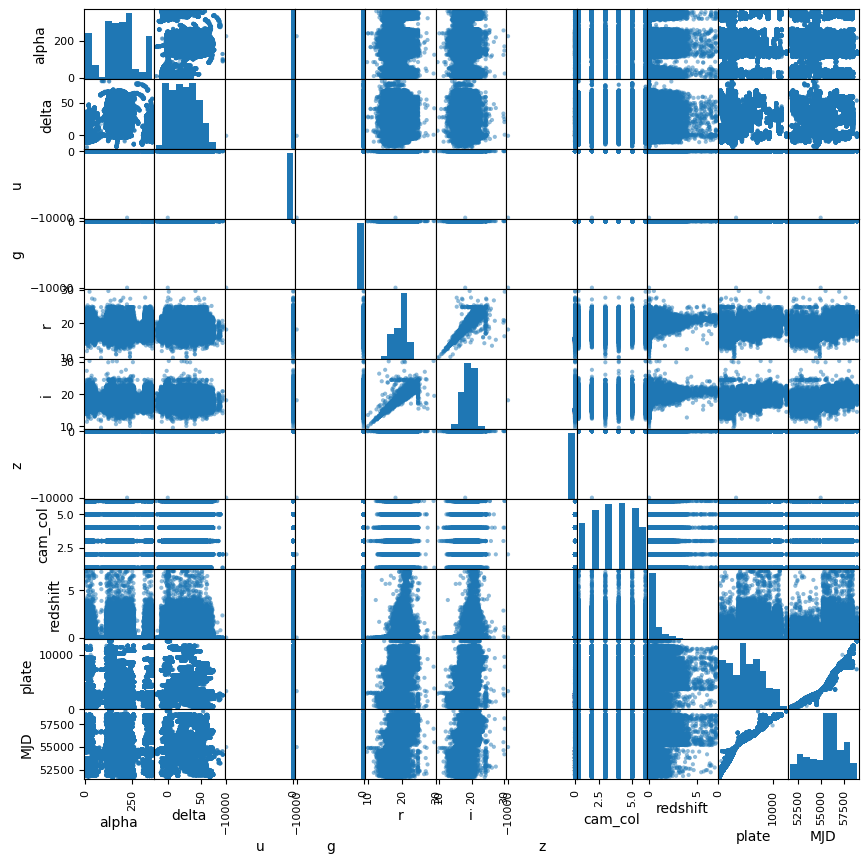

In [ ]:
# Gráficas para identificar relaciones entre las variables
pd.plotting.scatter_matrix(data, figsize=(10,10))

## Perfilado de datos

- Entrega un resumen o reporte de todos lo datos

In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 13.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#4. Limpieza de datos atípicos

- Sólo se limpian errores
- No se limpian pocos comunes o similares

In [10]:
#Se asigna valor nulo a los atípicos
data.u[data['u']<0]=np.nan #Nulo
data.g[data['g']<0]=np.nan #Nulo
data.z[data['z']<0]=np.nan #Nulo
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80846 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   alpha     80846 non-null  float64 
 1   delta     80846 non-null  float64 
 2   u         80845 non-null  float64 
 3   g         80845 non-null  float64 
 4   r         80846 non-null  float64 
 5   i         80846 non-null  float64 
 6   z         80845 non-null  float64 
 7   cam_col   80846 non-null  int64   
 8   class     80846 non-null  category
 9   redshift  80846 non-null  float64 
 10  plate     80846 non-null  int64   
 11  MJD       80846 non-null  int64   
dtypes: category(1), float64(8), int64(3)
memory usage: 7.5 MB


/tmp/ipython-input-1411881899.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.u[data['u']<0]=np.nan #Nulo
/tmp/ipython-input-1411881899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

#5. Limpieza de datos nulos: Imputación

Estrategia:
* Eliminar registros con mas de 30% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [11]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

In [12]:
#Imputacion de variables numéricas: media
var_numericas = ['alpha','delta','u','g','r','i','z','cam_col','redshift','plate', 'MJD']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[var_numericas] = ImpNumeros.fit_transform(data[var_numericas])

#Imputacion de variables categóricas: moda. No hay nulos en variables categóricas
#var_categoricas = []
#ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#data[var_categoricas] = ImpCategorias.fit_transform(data[var_categoricas])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80846 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   alpha     80846 non-null  float64 
 1   delta     80846 non-null  float64 
 2   u         80846 non-null  float64 
 3   g         80846 non-null  float64 
 4   r         80846 non-null  float64 
 5   i         80846 non-null  float64 
 6   z         80846 non-null  float64 
 7   cam_col   80846 non-null  float64 
 8   class     80846 non-null  category
 9   redshift  80846 non-null  float64 
 10  plate     80846 non-null  float64 
 11  MJD       80846 non-null  float64 
dtypes: category(1), float64(11)
memory usage: 7.5 MB


In [13]:
#Valores de la imputación
print(ImpNumeros.statistics_)
#print(ImpCategorias.statistics_)

[1.79712694e+02 2.41607446e+01 2.21613485e+01 2.07043601e+01
 1.97030510e+01 1.91284521e+01 1.88064975e+01 3.47667170e+00
 5.84376513e-01 5.20381253e+03 5.56424752e+04]


#6. Análisis de correlaciones para redundancias

- Valores mayores a 0.8 se eliminan

In [14]:
# Primero se hacen dummies
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, drop_first=False, dtype=int)
data_num.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class_GALAXY,class_QSO,class_STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2.0,0.634794,5812.0,56354.0,1,0,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5.0,0.779136,10445.0,58158.0,1,0,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2.0,0.644195,4576.0,55592.0,1,0,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3.0,0.932346,9149.0,58039.0,1,0,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3.0,0.116123,6121.0,56187.0,1,0,0


In [15]:
correlaciones = data_num.corr()

<Axes: >

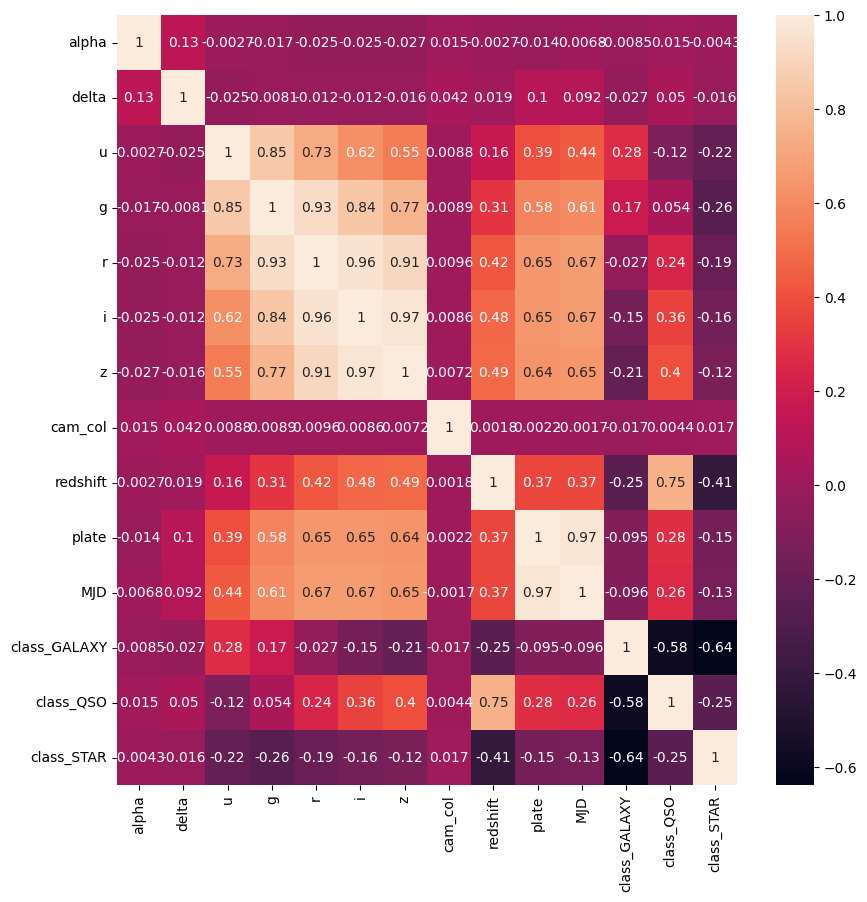

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones,annot=True)

In [17]:
#Detección de redundantes = se buscan correlaciones peligrosamente altas (0.8-1.0)

data = data.drop('plate',axis=1)
data = data.drop('MJD',axis=1)
data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2.0,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5.0,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2.0,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3.0,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3.0,GALAXY,0.116123


#7. Análisis de correlaciones para irrelevancias

- Valores menores a 0.05 o 0.1 se eliminan

In [ ]:
#En la misma matriz anterior: En la ultima fila o columna Fuga_Si

In [18]:
#Correlaciones con la variable de objetivo
cor_variable_obj=correlaciones.loc['class_STAR']
cor_variable_obj

,class_STAR
alpha,-0.004331
delta,-0.015693
u,-0.215900
g,-0.259833
r,-0.193688
i,-0.156914
z,-0.123731
cam_col,0.016531
redshift,-0.414051
plate,-0.150517


In [19]:
#Detección de irrelevancias: valores menores a 0.05
data = data.drop(['alpha', 'delta', 'cam_col'],axis=1)
data.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


#8. Balanceo de datos (clasificación)

- Nota: Esto no se ejecuta aqui. Esto se ejecuta después de la división de datos en el colab de los modelos
- Sólo en clasificación
- Sólo a variable objetivo

<Axes: xlabel='class'>

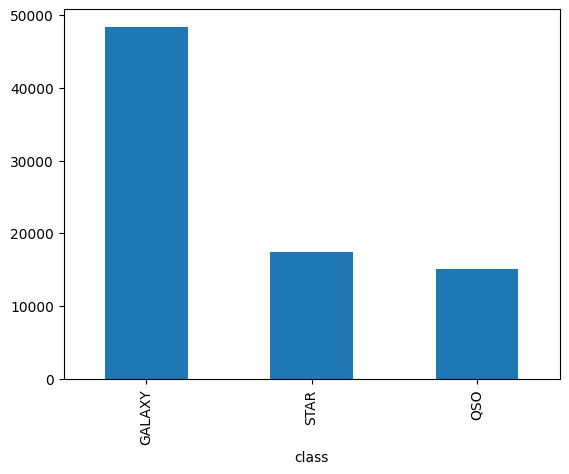

In [ ]:
data['class'].value_counts().plot(kind='bar')

- Viendo las categorías STAR y QSO, están mayor al 25%, por lo cual no se hace balanceo

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [ ]:
#sm = SMOTE( k_neighbors=2) #para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) #para variables predictoras categóricas

# sm = SMOTE(k_neighbors=2, sampling_strategy=0.25)
# X= data.drop('class', axis=1) #Predictoras
# Y= data['class'] #Objetivo
# X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

In [ ]:
# Creamos un dataframe con los resultados
# data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
# data['class']=Y_bal
# data['class'].value_counts().plot(kind='bar')

# 9. Ingeniería de características

- Creación de nuevas variables

- Transformaciones

- Si el metodo de ML es para variables categóricas (arboles, bayes, apriori)->Discretización
- Si el mertodo de ML es para variables numéricas(RN, regresiones, SVM, Knn, Kmeans)->Normalizar, dummies a las predictoras y labelencoder a la objetivo

In [20]:
data.to_excel('./datos_preparados.xlsx')

#9. Transformaciones

In [ ]:
#Dependen del método a utilizar

##Discretización: de numérica a categoría

In [ ]:
#Cut
data_cat=data.copy()
data_cat['Incapacidades'] = pd.cut(data_cat['Incapacidades'] , bins=3, right = False)
data_cat['Incapacidades'].value_counts().plot(kind='bar')

In [ ]:
#Discretizar indicando los nombres de las categorías
data_cat['Sueldo'] = pd.cut(data_cat['Sueldo'] , bins=3, labels=['bajo','medio','alto'])
data_cat['Sueldo'].value_counts().plot(kind='bar')

In [ ]:
data_cat['Hijos'] = pd.cut(data_cat['Hijos'] , bins=2, right = False)
data_cat['Hijos'].value_counts().plot(kind='bar')
data_cat

##Normalización

In [ ]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80846 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   u         80846 non-null  float64 
 1   g         80846 non-null  float64 
 2   r         80846 non-null  float64 
 3   i         80846 non-null  float64 
 4   z         80846 non-null  float64 
 5   class     80846 non-null  category
 6   redshift  80846 non-null  float64 
 7   plate     80846 non-null  float64 
 8   MJD       80846 non-null  float64 
dtypes: category(1), float64(8)
memory usage: 5.6 MB


In [ ]:
var_numericas = ['u','g','r','i','z','redshift']
min_max_scaler = MinMaxScaler()
data[var_numericas] = min_max_scaler.fit_transform(data[var_numericas])
data.head()

,u,g,r,i,z,class,redshift
0,0.591347,0.585669,0.535344,0.466590,0.464377,GALAXY,0.091831
1,0.632603,0.613347,0.646203,0.562951,0.607035,GALAXY,0.112389
2,0.654888,0.604993,0.546218,0.475389,0.472194,GALAXY,0.093170
3,0.511384,0.660326,0.596946,0.531017,0.487460,GALAXY,0.134210
4,0.387463,0.352188,0.337999,0.313145,0.300043,GALAXY,0.017959


##Dummies

- No se necesita ya que entre las variables predictoras no se encuentran variables categóricas

In [ ]:
#Variables categóricas con 2 categorías -> Borramos una dummy
# data = pd.get_dummies(data, columns=['Casado','Carro','Casa','Sexo'], drop_first=True, dtype=int)

# #data = pd.get_dummies(data, columns=['Tipo'], drop_first=False,  dtype=int) #No borra dummy
# data.head()

##Codificar variable objetivo

In [ ]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
data["class"] = labelencoder.fit_transform(data["class"])
data.head()

,u,g,r,i,z,class,redshift
0,0.591347,0.585669,0.535344,0.466590,0.464377,0,0.091831
1,0.632603,0.613347,0.646203,0.562951,0.607035,0,0.112389
2,0.654888,0.604993,0.546218,0.475389,0.472194,0,0.093170
3,0.511384,0.660326,0.596946,0.531017,0.487460,0,0.134210
4,0.387463,0.352188,0.337999,0.313145,0.300043,0,0.017959


#Descargar datos preparados

In [ ]:
data.to_excel('./datos_numericos.xlsx')